In [105]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
port = pd.read_csv('25_Portfolios_ME_Prior_12_2.CSV', skiprows=11, nrows=1167)
mom = pd.read_csv('F-F_Momentum_Factor.CSV',skiprows=13, nrows=1167)
fact = pd.read_csv('F-F_Research_Data_5_Factors_2x3.csv', skiprows=3, nrows=729)

port.drop(port.tail(1).index, inplace=True)
mom.drop(mom.tail(1).index, inplace=True)
fact.drop(fact.tail(1).index, inplace=True)


port['Unnamed: 0'] = port['Unnamed: 0'].astype(int)
mom['Unnamed: 0'] = mom['Unnamed: 0'].astype(int)
fact['Unnamed: 0'] = fact['Unnamed: 0'].astype(int)

port.set_index('Unnamed: 0' , inplace=True)
mom.set_index('Unnamed: 0' , inplace=True)
fact.set_index('Unnamed: 0' , inplace=True)

data = port.join(fact, rsuffix='r').join(mom, rsuffix='r').dropna()

portfolios = port.columns

In [54]:
portfolios

Index(['SMALL LoPRIOR', 'ME1 PRIOR2', 'ME1 PRIOR3', 'ME1 PRIOR4',
       'SMALL HiPRIOR', 'ME2 PRIOR1', 'ME2 PRIOR2', 'ME2 PRIOR3', 'ME2 PRIOR4',
       'ME2 PRIOR5', 'ME3 PRIOR1', 'ME3 PRIOR2', 'ME3 PRIOR3', 'ME3 PRIOR4',
       'ME3 PRIOR5', 'ME4 PRIOR1', 'ME4 PRIOR2', 'ME4 PRIOR3', 'ME4 PRIOR4',
       'ME4 PRIOR5', 'BIG LoPRIOR', 'ME5 PRIOR2', 'ME5 PRIOR3', 'ME5 PRIOR4',
       'BIG HiPRIOR'],
      dtype='object')

In [109]:
res_all = []
for p in portfolios:
    res = sm.OLS(data[p] - data['RF'], sm.add_constant(data['Mkt-RF'])).fit(cov_type='HC0')
    res_all.append(res)
    print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     608.4
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           4.82e-98
Time:                        21:25:44   Log-Likelihood:                -2250.6
No. Observations:                 728   AIC:                             4505.
Df Residuals:                     726   BIC:                             4514.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7194      0.186     -3.860      0.0

Observing the results of the regressions we see that the P values for the betas are universally very small and so are the standard deviations. Thus I belive the Betas are estimated accuratly. 

b) For most protfolios the alphas have a low p value, but not for all. We also see that the range for the alphas is significantly larger than that of the betas. Hence, I think that the alphas are much less significant than the betas, possibly not economically significant at all.

c) not sure

/tmp/ipykernel_111978/2810298609.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alphas = [i.params[0] for i in res_all]


Text(0, 0.5, 'Average Portfolio Return')

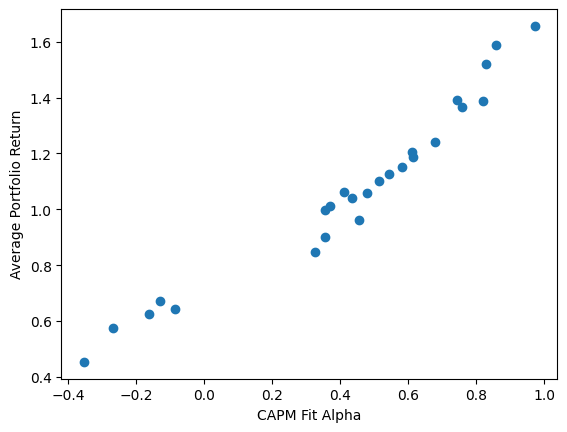

In [111]:
alphas = [i.params[0] for i in res_all]
means = [data[i].mean() for i in portfolios]

fig, ax = plt.subplots()
ax.scatter(betas, means)

ax.set_xlabel('CAPM Fit Alpha')
ax.set_ylabel('Average Portfolio Return')

In [112]:
for p, i in zip(portfolios, res_all):
    print(p,':', i.tvalues[0])

SMALL LoPRIOR : -3.8603212614320923
ME1 PRIOR2 : 0.5382033628727428
ME1 PRIOR3 : 2.634806552268032
ME1 PRIOR4 : 3.70324440011955
SMALL HiPRIOR : 3.922141544411007
ME2 PRIOR1 : -4.045179580241544
ME2 PRIOR2 : 0.4111281656551372
ME2 PRIOR3 : 2.4589851688326445
ME2 PRIOR4 : 3.842768131355204
ME2 PRIOR5 : 3.651974960266981
ME3 PRIOR1 : -3.2177435546665802
ME3 PRIOR2 : -0.1090842385822105
ME3 PRIOR3 : 1.7000428962007548
ME3 PRIOR4 : 2.080768563641185
ME3 PRIOR5 : 3.935087634534737
ME4 PRIOR1 : -3.2574024951604375
ME4 PRIOR2 : 0.03513560732609473
ME4 PRIOR3 : 1.5669150405227732
ME4 PRIOR4 : 3.209731539525625
ME4 PRIOR5 : 3.5701678094829563
BIG LoPRIOR : -2.904735440517503
ME5 PRIOR2 : -0.10282590243373377
ME5 PRIOR3 : -0.6596352191944346
ME5 PRIOR4 : 1.44414576965186
BIG HiPRIOR : 2.603801105131941


/tmp/ipykernel_111978/1526723268.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(p,':', i.tvalues[0])


We see here that the alpha is not always significant based on the t-test.

e) Compute the GRS test for the joint null H0 : αi = 0 ∀i

In [172]:
errors = []
for r in res_all:
    errors.append(r.resid)

cov_matrix = np.cov(errors)

market_sr = data['Mkt-RF'].mean()/data['Mkt-RF'].std()

GRS = np.array(alphas) @ np.linalg.inv(cov_matrix) @ (np.array(alphas)/(1+market_sr**2)*len(data))
print("GRS:", GRS)

from scipy.stats import chi2
df = 25
print("Chi-squared test: p-val=", 1-chi2.cdf(GRS, 25, loc=0, scale=1))


GRS: 105.21414864114391
Chi-squared test: p-val= 8.18789480661053e-12


f) Plot the theoretical Capital Market Line and the mean-variance frontier spanned by the 25 portfolios.
How does this figure relate to the regression pricing errors?

In [177]:
means = [data[i].mean() for i in portfolios]
variances = [data[i].std() for i in portfolios]

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting
plt.style.use('seaborn-v0_8-deep')
ef = EfficientFrontier(np.mean(data(train_data), np.cov(data[portfolios].T), weight_bounds=(None, None)))
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
                       
fig, ax = plt.subplots()
ax.scatter(variances, means)


x = np.linspace(0, 10, 500)
ax.plot(x, [ data['RF'].mean() + (data['Mkt-RF'].mean()/data['Mkt-RF'].std())*i for i in x], linestyle='-', color='red', label='CML')


ax.set_xlabel('Variance')
ax.set_ylabel('Mean Return')

fig.show()

OSError: 'seaborn-deep' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [176]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


g) Over

# 5

In [145]:
res_all = []
for p in portfolios:
    res = sm.OLS(data[p] - data['RF'], sm.add_constant(data[['Mkt-RF', 'SMB', 'HML', 'Mom   ' ]])).fit(cov_type='HC0')
    res_all.append(res)
    print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     1229.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          1.15e-320
Time:                        22:56:43   Log-Likelihood:                -1706.5
No. Observations:                 728   AIC:                             3423.
Df Residuals:                     723   BIC:                             3446.
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3551      0.115     -3.081      0.0

In [146]:
for p, i in zip(portfolios, res_all):
    print(p,':', i.tvalues[0])

SMALL LoPRIOR : -3.08050168034971
ME1 PRIOR2 : 0.9318155359273299
ME1 PRIOR3 : 2.9752461333711153
ME1 PRIOR4 : 3.087068964622376
SMALL HiPRIOR : 3.317504367467227
ME2 PRIOR1 : -2.65446939630556
ME2 PRIOR2 : 1.9735928899830328
ME2 PRIOR3 : 2.150811957795305
ME2 PRIOR4 : 3.1840721541855066
ME2 PRIOR5 : 2.2301985507403654
ME3 PRIOR1 : -0.08258389809527876
ME3 PRIOR2 : 1.5569740509431365
ME3 PRIOR3 : 1.6230854421995147
ME3 PRIOR4 : -0.715555454331096
ME3 PRIOR5 : 2.1203170684015156
ME4 PRIOR1 : -0.10678071150458356
ME4 PRIOR2 : 2.5543515775217225
ME4 PRIOR3 : 1.6015391290727155
ME4 PRIOR4 : 1.0417927105021465
ME4 PRIOR5 : 0.4981555097448184
BIG LoPRIOR : 1.068691083491345
ME5 PRIOR2 : 4.090121392833029
ME5 PRIOR3 : 0.09077778594164534
ME5 PRIOR4 : -1.041265162505003
BIG HiPRIOR : -0.903231615405188


/tmp/ipykernel_111978/1526723268.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(p,':', i.tvalues[0])


In [147]:
alphas = [i.params[0] for i in res_all]
betas = [i.params[1:] for i in res_all]
mean_excess = [np.mean(data[p] - data['RF']) for p in portfolios]

res_cross = []

res = sm.OLS(mean_excess, sm.add_constant(np.array([betas, alphas]).T)).fit(cov_type='HC0')
res_cross.append(res)
print(res.summary())

/tmp/ipykernel_111978/2737922691.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alphas = [i.params[0] for i in res_all]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 25) + inhomogeneous part.

We see that the 

In [ ]:
for i in zip


# 6 Fama-MacBeth

In [148]:
np.array([betas, alphas]).T

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 25) + inhomogeneous part.

SyntaxError: can't use starred expression here (3069767005.py, line 1)